## About the Dataset
Data were extracted from images that were taken from genuine and forged banknote-like specimens. 
For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

### variance 
Variance of Wavelet Transformed Image - Continuous - Variance finds how each pixel varies from the neighboring pixels and classifies them into different regions 
### skewness 
Skewness of Wavelet Transformed image - Continuous - Skewness is the measure of the lack of symmetry
### curtosis
Curtosis of Wavelet Transformed image - Continuous - Curtosis is a measure of whether the data are heavytailed or light-tailed relative to a normal distribution
### entropy
Entropy of image - Continuous - Image entropy is a quantity which is used to describe the amount of information which must be coded for, by a compression algorithm
### class
Class - Integer - Class contains two values 0 representing genuine note and 1 representing fake note

## Identify the problem

Some miscreants introduce fake notes which bear a resemblance to original note to create discrepancies of the money in the financial market. It is difficult for humans to tell true and fake banknotes apart especially because they have a lot of similar features. Fake notes are created with precision, hence there is need for an efficient algorithm which accurately predicts whether a banknote is genuine or not. 

## Expected Outcome

The expected outcome of the dataset are
* 1 = representing Fake note
* 0 = representing Genuine note

## Objective
Since the labels in the data are discrete, the predication falls into two categories, (i.e. Fake or Genuine> *Thus, the goal is to classify whether the bank note is fake or genuine. To achieve this we have used machine learning classification methods to fit a function that can predict the discrete class of new input.*). In machine learning this is a classification problem. 
> *Thus, the goal is to classify whether the banknote is genuine or fake and predict the recurrence and non-recurrence of Fake note cases after a certain period.  To achieve this we have used machine learning classification methods to fit a function that can predict the discrete class of new input.*

### Starting with Importing all the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import pickle
%matplotlib inline

In [2]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Created wheel for pandas-profiling: filename=pandas_profiling-2.11.0-py2.py3-none-any.whl size=243682 sha256=dabad060d5ac0250712237ff05ae7a751f942ed92ad484ce1c46b06012385ec5
  Stored in directory: C:\Users\sambi\AppData\Local\Temp\pip-ephem-wheel-cache-i64rt76o\wheels\cc\d5\09\083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
Successfully built pandas-profiling
  Attempting uninstall: pandas-profiling
    Found existing installation: pandas-profiling 2.10.1
    Uninstalling pandas-profiling-2.10.1:
      Successfully uninstalled pandas-profiling-2.10.1


In [3]:
from pandas_profiling import ProfileReport

In [4]:
#Load Dataset
df = pd.read_csv("BankNote_Authentication.csv")
# Visualization of data
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
# Getting the shape of the data
df.shape

(1372, 5)

In [6]:
# columns of the dataset
df.columns

Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')

In [7]:
# to get all the information about all the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [8]:
# To get all the details
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
variance,1372.0,0.433735,2.842763,-7.0421,-1.773000,0.49618,2.821475,6.8248
skewness,1372.0,1.922353,5.869047,-13.7731,-1.708200,2.31965,6.814625,12.9516
curtosis,1372.0,1.397627,4.310030,-5.2861,-1.574975,0.61663,3.179250,17.9274
entropy,1372.0,-1.191657,2.101013,-8.5482,-2.413450,-0.58665,0.394810,2.4495
class,1372.0,0.444606,0.497103,0.0000,0.000000,0.00000,1.000000,1.0000


In [9]:
# To check if there is any null values present in the dataset
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [10]:
for item in df.columns:
    print(item, ": " )
    print(df[item].unique())
    print(df[item].value_counts())
    print("************************************************")

variance : 
[ 3.6216  4.5459  3.866  ... -3.7503 -3.5637 -2.5419]
 0.57060    5
 0.32920    4
 0.37980    4
 0.51950    4
-0.20620    3
           ..
 1.74960    1
 5.93740    1
-3.35820    1
 1.64260    1
 0.14329    1
Name: variance, Length: 1338, dtype: int64
************************************************
skewness : 
[  8.6661    8.1674   -2.6383  ... -13.4586   -8.3827   -0.65804]
-4.45520    6
-3.26330    5
-3.79710    4
-0.02480    4
 0.70980    4
           ..
-4.07650    1
-0.48422    1
 8.68060    1
 8.64130    1
 3.91300    1
Name: skewness, Length: 1256, dtype: int64
************************************************
curtosis : 
[-2.8073 -2.4586  1.9242 ... 17.5932 12.393   2.6842]
 1.24210    5
 4.57180    5
 3.08950    5
 0.75720    4
-2.95300    3
           ..
 0.78886    1
-1.41920    1
 2.64730    1
-3.20740    1
 9.11220    1
Name: curtosis, Length: 1270, dtype: int64
************************************************
entropy : 
[-0.44699 -1.4621   0.10645 ... -1.2953  

<AxesSubplot:xlabel='class', ylabel='count'>

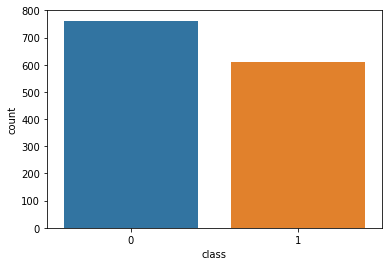

In [11]:
sns.countplot(data = df, x ="class")

##### This plot shows that the dataset is a balanced dataset

<AxesSubplot:>

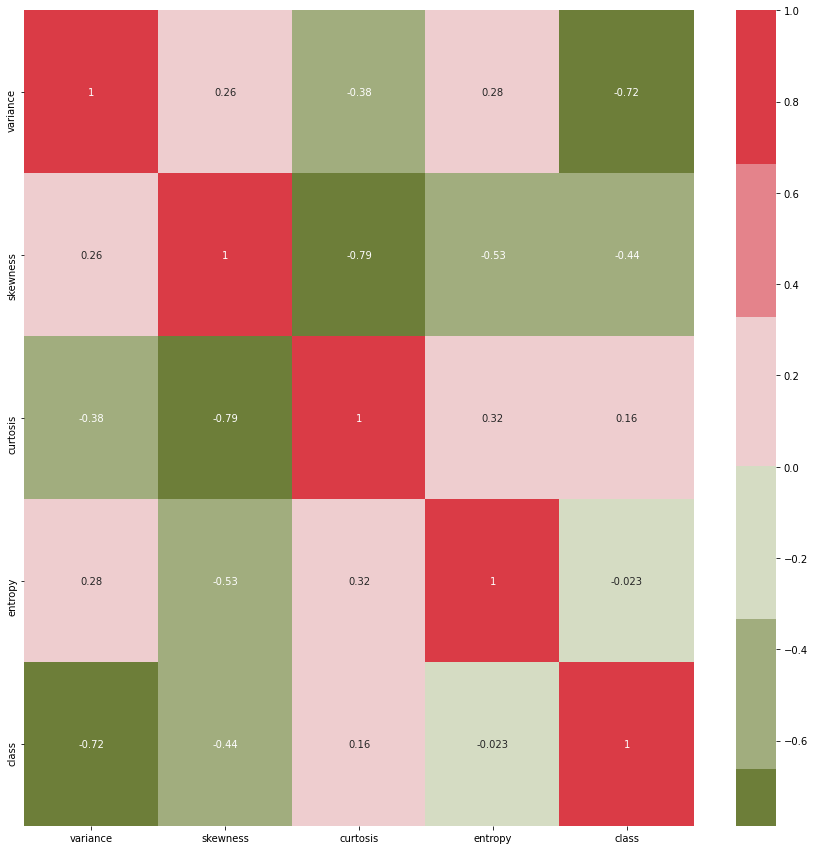

In [12]:
correlation = df.corr()
plt.figure(figsize = (15,15))
cmap= sns.diverging_palette(100, 10)
sns.heatmap(correlation, annot = True, cmap =cmap, center = 0)

##### this correlation diagram shows that the class column does not have much correlation with other column of the dataset

##### Lets plot some more diagram to check how the class is impacted by other features

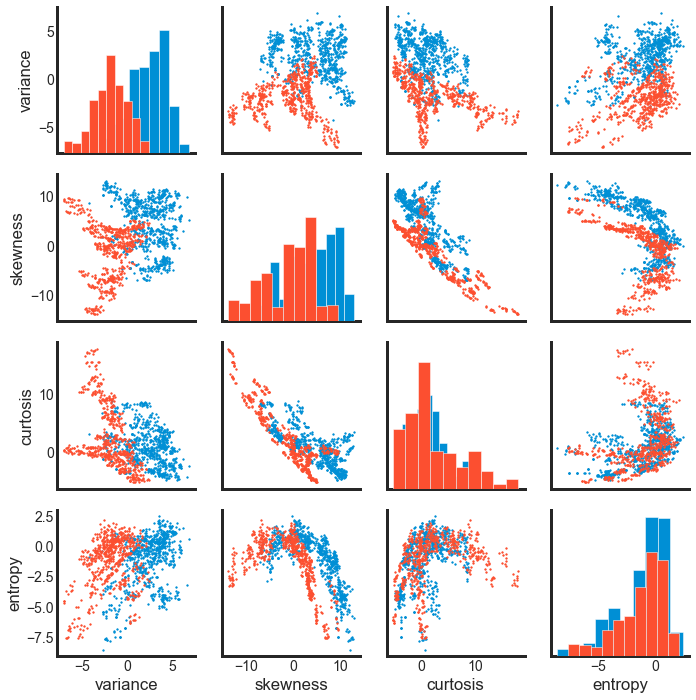

In [13]:
plt.style.use("fivethirtyeight")
sns.set_style("white")
data = df
plot = sns.PairGrid(data[[data.columns[0],data.columns[1], data.columns[2],data.columns[3],data.columns[4]]], hue = "class")
plot = plot.map_diag(plt.hist)
plot = plot.map_offdiag(plt.scatter, s=3)

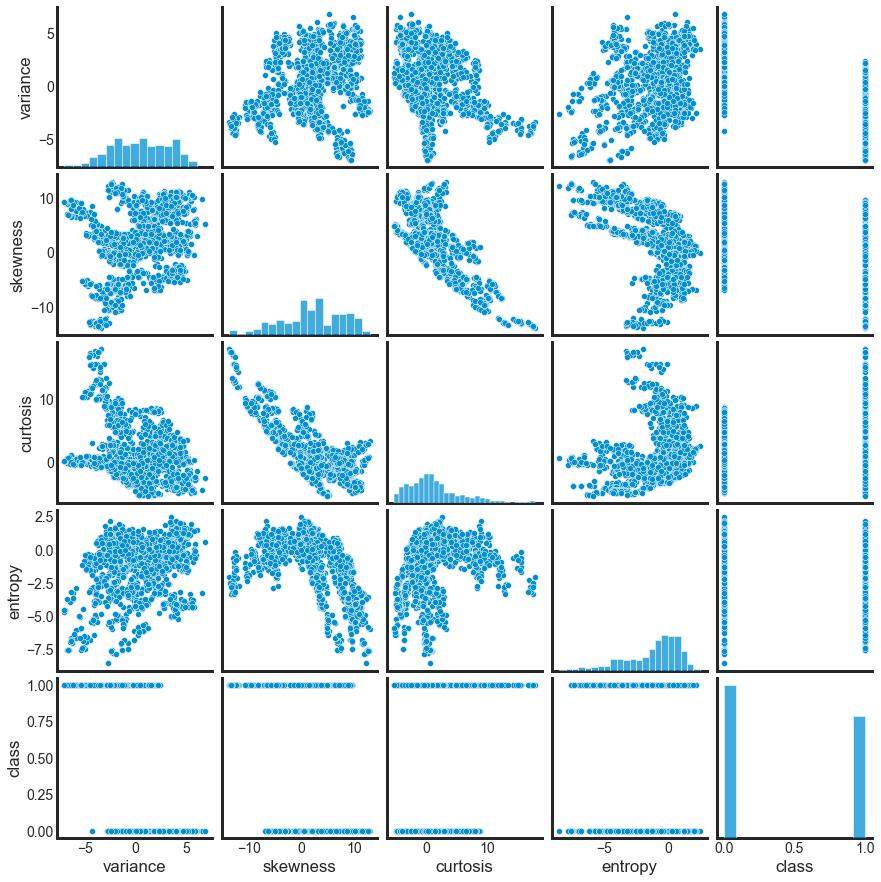

In [14]:
sns.pairplot(df)

In [15]:
profile = ProfileReport(df, title = "Pandas Profile")
profile

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

###### Using Pandas Profiling, we can get details null value counts correlation details with in 1 minutes

##### Independent Features and Dependent Features

In [16]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [17]:
X.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [18]:
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

##### Dividing records in training and testing sets with test size 20% of whole dataset

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [20]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1097, 4) (275, 4) (1097,) (275,)


##### Creating the Random Forest Classifier model and training the 80% data of the dataset

In [21]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

##### Creating a predicted column and assigning the prediction and Comparing

In [22]:
y_pred= model.predict(X_test)

In [23]:
comparing_dataframe = pd.DataFrame({"Predicted ": y_pred, "Actual ": y_test})

#####  evaluating the accuracy score and confusion matrix

In [24]:
print("Accuracy Score : ", accuracy_score(y_pred, y_test))
print("Confusion Matrix : ", confusion_matrix(y_pred,y_test))

Accuracy Score :  0.9854545454545455
Confusion Matrix :  [[155   2]
 [  2 116]]


##### Saving the model

In [25]:
pickle_out = open("model.pkl","wb")
pickle.dump(model, pickle_out)
pickle_out.close()